# Big Data Project
## Variables Impacting on Mental Fatigue in the Workplace
CS982: Big Data Technologies
<br>Andrew Mungall
<br>Student Number: 202050248


In [1]:
import sys
sys.version

'3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
# load in dataframe with the intent to keep variable the same
data = pd.read_csv("Burnout.csv")
# load second datset to create numeric dataframe
n_data = pd.read_csv("Burnout.csv")

# Information about the data
Received from: https://www.kaggle.com/blurredmachine/are-your-employees-burning-out?select=test.csv
<br>
- **Employee ID**: The unique ID allocated for each employee (example: fffe390032003000)
- **Date of Joining**: The date-time when the employee has joined the organization (example: 2008-12-30)
- **Gender**: The gender of the employee (Male/Female)
- **Company Type**: The type of company where the employee is working (Service/Product)
- **WFH Setup Available**: Is the work from home facility available for the employee (Yes/No)
- **Designation**: The designation of the employee of work in the organization. In the range of [0.0, 5.0] bigger is higher designation.
- **Resource Allocation**: The amount of resource allocated to the employee to work, ie. number of working hours. In the range of [1.0, 10.0] (higher means more resource)
- **Mental Fatigue Score**: The level of fatigue mentally the employee is facing. In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.

In [4]:
# Check for na values in dataset
data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [5]:
# check for null values in dataset
data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [6]:
data.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
dtype: object

In [7]:
duplicate_ID = data['Employee ID'].duplicated()
print("The percentage of accounts not duplicated:")
print(duplicate_ID.value_counts(normalize = True))

The percentage of accounts not duplicated:
False    1.0
Name: Employee ID, dtype: float64


In [8]:
data = data.drop(columns = ["Employee ID"])
n_data = n_data.drop(columns = ["Employee ID"])

In [9]:
data

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...
12245,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,2008-02-06,Male,Service,No,3.0,6.0,6.7


### Change date to number of months at company

Set target date of when the employee completed the questionnaire. Although this is not set out in the dataset, this report will assume that the data was collected on the October 10, 2009.
This will create a distribution handling the different months employees joined the company.

In [10]:
import datetime

# For non-numerical dataset
data['Date of Joining'] =  pd.to_datetime(data['Date of Joining'], format='%Y-%m-%d')
data['Months since Joined'] = ((datetime.datetime(2009, 10, 10) - data["Date of Joining"])/np.timedelta64(1, 'M'))
data['Months since Joined'] = data['Months since Joined'].astype(int)
data = data.drop(columns = ["Date of Joining"])

In [11]:
# For numerical dataset
n_data['Date of Joining'] =  pd.to_datetime(n_data['Date of Joining'], format='%Y-%m-%d')
n_data['Months since Joined'] = ((datetime.datetime(2009, 10, 10) - n_data["Date of Joining"])/np.timedelta64(1, 'M'))
n_data['Months since Joined'] = n_data['Months since Joined'].astype(int)
n_data = n_data.drop(columns = ["Date of Joining"])

### Edit Variable for Numeric Dataset
Gender was changed from Female and Male to 1 and 0 respectively.
<br>WFH Setup Available was changed from yes and no to 1 and 0 respectively.
<br>Company type was made into two dummy values for Service and Product

In [12]:
n_data['Gender'] = n_data['Gender'].map({'Female': 1, 'Male': 0})
n_data['WFH Setup Available'] = n_data['WFH Setup Available'].map({'Yes': 1, 'No': 0})

In [13]:
n_data = pd.get_dummies(n_data, columns = ["Company Type"])

### Correlations in the data

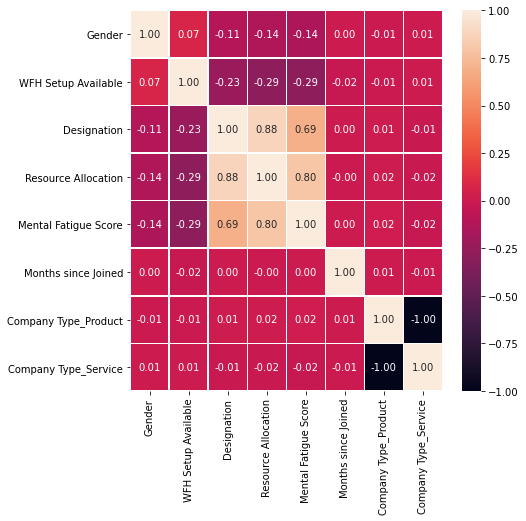

In [14]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(n_data.loc[:,:].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

The correlations focused on are related to the Mental fatigue Score. The 

### Distribution of Mental Fatigue score

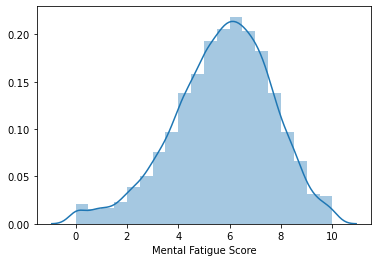

In [15]:
sns.distplot(data["Mental Fatigue Score"], bins=20 )

In [16]:
data[["Mental Fatigue Score"]].describe()

,Mental Fatigue Score
count,12250.000000
mean,5.720571
std,1.914063
min,0.000000
25%,4.500000
50%,5.900000
75%,7.100000
max,10.000000


In [17]:
scipy.stats.normaltest(data["Mental Fatigue Score"])

NormaltestResult(statistic=355.6870395938454, pvalue=5.801505521913356e-78)

## Visualisation of Mental fatigue compared with other Variables

### Differences between Sex

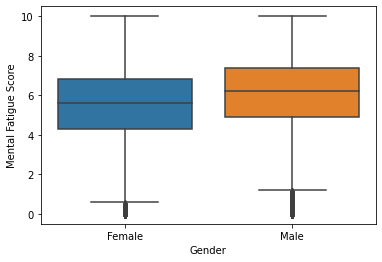

In [18]:
sns.boxplot( x=data["Gender"], y=data["Mental Fatigue Score"] )

Males seem to have a slightly higher mental fatigue score than woman.

In [19]:
print(data[["Gender"]].describe())
print("\nFemales make up {:.2f} of the dataset".format((6445/12250*100)))

        Gender
count    12250
unique       2
top     Female
freq      6445

Females make up 52.61 of the dataset


### Resource Allocation

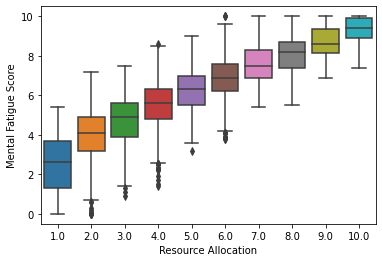

In [20]:
sns.boxplot( x=data["Resource Allocation"], y=data["Mental Fatigue Score"])

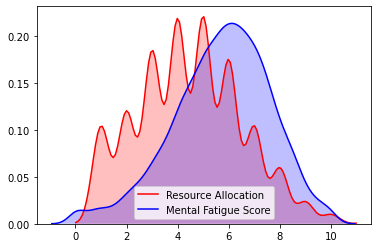

In [22]:
p1=sns.kdeplot(data["Resource Allocation"], shade=True, color="r")
p1=sns.kdeplot(data["Mental Fatigue Score"], shade=True, color="b")
plt.show()

### WFH Setup Available

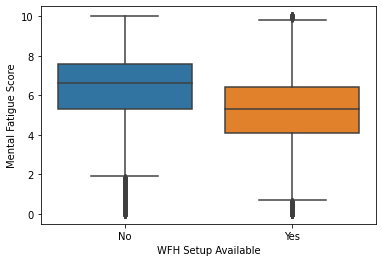

In [23]:
sns.boxplot( x=data["WFH Setup Available"], y=data["Mental Fatigue Score"] )

In [24]:
print(data[["WFH Setup Available"]].describe())
print("\nYes make up {:.2f} of the dataset".format((6638/12250*100)))

       WFH Setup Available
count                12250
unique                   2
top                    Yes
freq                  6638

Yes make up 54.19 of the dataset


### Coompany Type

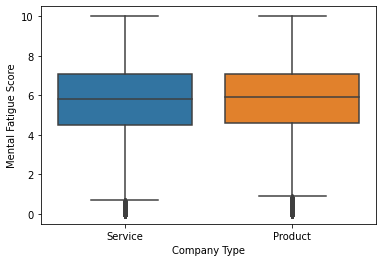

In [25]:
sns.boxplot( x=data["Company Type"], y=data["Mental Fatigue Score"] )

In [27]:
print(data[["Company Type"]].describe())
print("\nService employees make up {:.2f} of the dataset".format((8004/12250*100)))

       Company Type
count         12250
unique            2
top         Service
freq           8004

Service employees make up 65.34 of the dataset


### Months since Joined

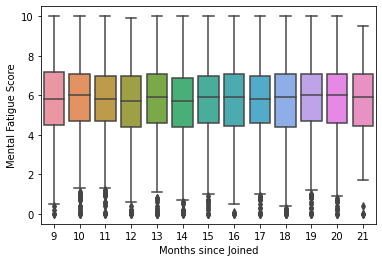

In [29]:
sns.boxplot( x=data["Months since Joined"], y=data["Mental Fatigue Score"] )

### Designation

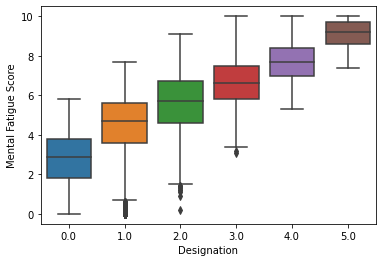

In [31]:
sns.boxplot( x=data["Designation"], y=data["Mental Fatigue Score"])

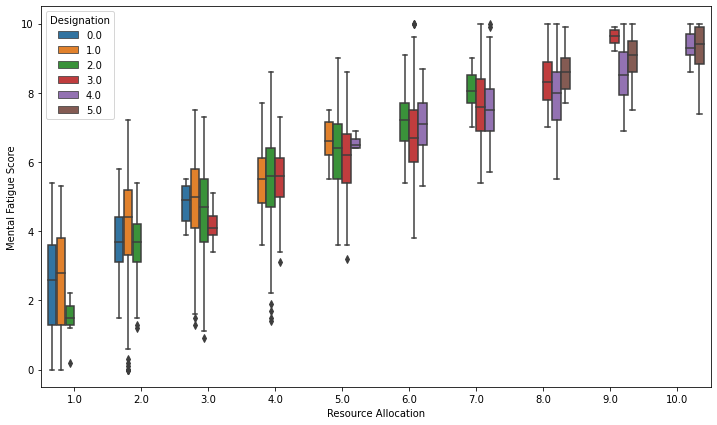

In [32]:
fig, ax = plt.subplots(figsize=(12,7)) 
sns.boxplot( x=data["Resource Allocation"], y=data["Mental Fatigue Score"], hue=data["Designation"])

In [33]:
n_data.dtypes

Gender                    int64
WFH Setup Available       int64
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Months since Joined       int32
Company Type_Product      uint8
Company Type_Service      uint8
dtype: object

### Put the prediction variable to the end of the dataframe

In [34]:
n_data["MFS"] = n_data["Mental Fatigue Score"]
n_data = n_data.drop(columns = ["Mental Fatigue Score"])

In [35]:
n_data.dtypes

Gender                    int64
WFH Setup Available       int64
Designation             float64
Resource Allocation     float64
Months since Joined       int32
Company Type_Product      uint8
Company Type_Service      uint8
MFS                     float64
dtype: object

# Unsupervised Method

## K-Means with MFS Levels

The data for MSF score will be transformed into ranked data in the following format:
- Level 1: MFS less than two
- Level 2: MFS score between 2 and 4
- Level 3: MFS score between 4 and 6
- Level 4: MFS score between 6 and 8
- Level 5: MFS score between 8 and 10

In [36]:
UN_data = n_data
conditions = [
    (UN_data['MFS'] <= 2),
    (UN_data['MFS'] > 2) & (UN_data['MFS'] <= 4),
    (UN_data['MFS'] > 4) & (UN_data['MFS'] <= 6),
    (UN_data['MFS'] > 6) & (UN_data['MFS'] <= 8),
    (UN_data['MFS'] > 8) & (UN_data['MFS'] <= 10),
]

values = [1, 2, 3, 4, 5]


UN_data["MFS_Level"] = np.select(conditions, values)

UN_data = UN_data.drop(columns = ["MFS"])

In [37]:
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### The data types with the least impactful relationships are dropped from the dataset

In [38]:
UN_data1 = UN_data.drop(["Gender", "Months since Joined", "Company Type_Product", "Company Type_Service"], axis = 1)
UN_data1.shape
UN_data1.head() #Test

,WFH Setup Available,Designation,Resource Allocation,MFS_Level
0,0,2.0,5.0,4
1,1,1.0,2.0,3
2,1,1.0,3.0,3
3,0,3.0,6.0,3
4,0,2.0,5.0,4


### Hopkins test to find if clustering seems likely

In [39]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(UN_data1)

1.0

### With a Hopkins score of 0.999, we can identify that the data available has a high tendency to cluster, and thus our method for supervised analysis is valid to use. Below starts the K-Means analysis

In [40]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(UN_data)
    sse_.append([k, silhouette_score(UN_data1, kmeans.labels_)])

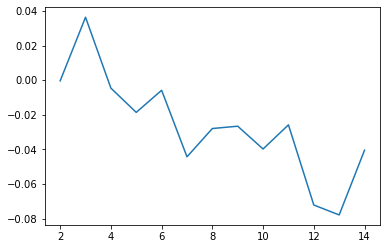

In [41]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

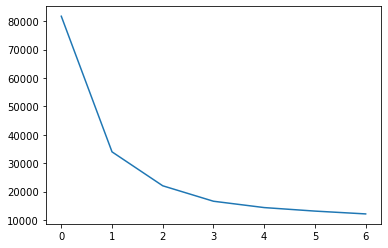

In [42]:
#Elbow plot to find optimal k for clustering
# sum of squared distances
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(UN_data1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### The Elbow graph suggests that the best number of clusters in this dataset will be 3

### K-Means Analysis

In [43]:
model_clus5 = KMeans(n_clusters = 3, max_iter=50)
model_clus5.fit(UN_data1)

KMeans(max_iter=50, n_clusters=3)

In [44]:
# analysis of clusters formed
UN_data1.index = pd.RangeIndex(len(UN_data.index)) 
UN_data_km = pd.concat([UN_data1, pd.Series(model_clus5.labels_)], axis=1)
UN_data_km.columns = ["WFH Setup Available", "Designation", "Resource Allocation", "MFS_Level", 'ClusterID']
UN_data_km[:30]

,WFH Setup Available,Designation,Resource Allocation,MFS_Level,ClusterID
0,0,2.0,5.0,4,1
1,1,1.0,2.0,3,2
2,1,1.0,3.0,3,2
3,0,3.0,6.0,3,0
4,0,2.0,5.0,4,1
5,0,3.0,5.0,4,1
6,1,2.0,3.0,3,1
7,0,2.0,5.0,5,1
8,1,2.0,5.0,4,1
9,1,2.0,5.0,3,1


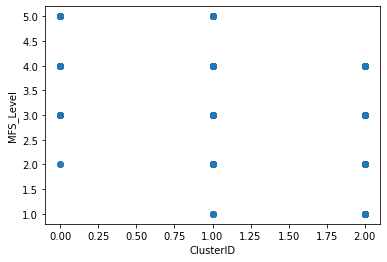

In [45]:
sns.regplot(x=UN_data_km['ClusterID'], y=UN_data_km['MFS_Level'], fit_reg=False)

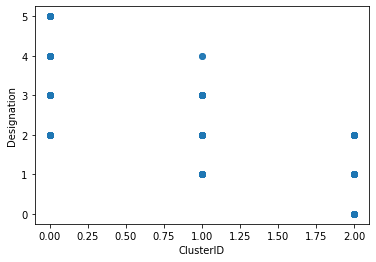

In [46]:
sns.regplot(x=UN_data_km['ClusterID'], y=UN_data_km['Designation'], fit_reg=False)

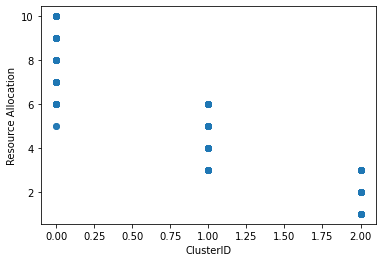

In [47]:
sns.regplot(x=UN_data_km['ClusterID'], y=UN_data_km['Resource Allocation'], fit_reg=False)

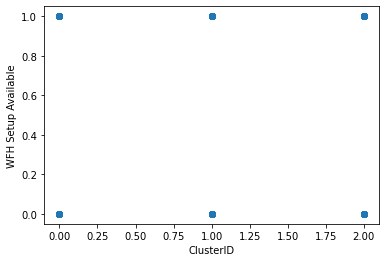

In [48]:
sns.regplot(x=UN_data_km['ClusterID'], y=UN_data_km['WFH Setup Available'], fit_reg=False)

# Supervised Method

In [49]:
n_data.dtypes

Gender                    int64
WFH Setup Available       int64
Designation             float64
Resource Allocation     float64
Months since Joined       int32
Company Type_Product      uint8
Company Type_Service      uint8
MFS                     float64
MFS_Level                 int32
dtype: object

In [50]:
n_data.dtypes

Gender                    int64
WFH Setup Available       int64
Designation             float64
Resource Allocation     float64
Months since Joined       int32
Company Type_Product      uint8
Company Type_Service      uint8
MFS                     float64
MFS_Level                 int32
dtype: object

### Multiple Linear Regression

In [52]:
# with statsmodels
import statsmodels.api as sm

#X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(n_data["MFS"], n_data.loc[:, "Gender":"Company Type_Service"]).fit()
#predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    MFS   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3651.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:40:43   Log-Likelihood:                -19051.
No. Observations:               12250   AIC:                         3.812e+04
Df Residuals:                   12243   BIC:                         3.817e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                  -0.1215 

### Drop Variables which are not Significant

In [53]:
ML_data = n_data.drop(["Months since Joined"], axis = 1)

### Split the data (training = 70%, testing = 30%)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ML_data.loc[:, "Gender":"Company Type_Service"],
                                                    ML_data["MFS"], test_size=0.3, random_state=6)

### Prediction Model for Multiple Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The Root Mean Squared Error
print('Root Mean Squared Error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-0.11510032 -0.25583929 -0.07023209  0.75792009  0.00957754 -0.00957754]
Mean squared error: 1.34
Root Mean Squared Error: 1.16
Coefficient of determination: 0.64


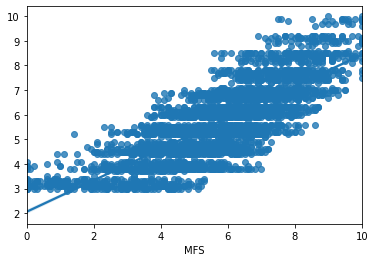

In [58]:
sns.regplot(x= y_test, y= np.around(y_pred, decimals = 1))

### Logistic Regression
To create a logistic regression model for this dataset, the mental fatigue score will be transformed into a new variable. Where Mental Fatigue Score is high, >6, will be represented by 1. Where mental fatigue score is low, <6, it will be represented by 0. This is chosen by the information shown in the distribution of the histogram.

In [62]:
LR_data = n_data

In [63]:
conditions = [
    (LR_data['MFS'] <= 2),
    (LR_data['MFS'] > 2) & (LR_data['MFS'] <= 4),
    (LR_data['MFS'] > 4) & (LR_data['MFS'] <= 6),
    (LR_data['MFS'] > 6) & (LR_data['MFS'] <= 8),
    (LR_data['MFS'] > 8) & (LR_data['MFS'] <= 10),
]

values = [0, 0, 0, 1, 1]


LR_data["MFS_Level"] = np.select(conditions, values)

In [64]:
LR_data = LR_data.drop(columns = ["MFS"])

### Logistic Regression of Full Dataset

In [65]:
import statsmodels.api as sm
logit_model=sm.Logit(LR_data["MFS_Level"],LR_data.loc[:, "Gender":"Company Type_Service"])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.410862
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.405     
Dependent Variable:   MFS_Level         AIC:               10080.1166
Date:                 2020-11-08 20:41  BIC:               10132.0095
No. Observations:     12250             Log-Likelihood:    -5033.1   
Df Model:             6                 LL-Null:           -8453.7   
Df Residuals:         12243             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Gender               -0.3380   0.0499  -6.7784 0.0000 -0.4357 -0.2402
WFH Setup Availa

In [66]:
LR_data = LR_data.drop(["Months since Joined"], axis = 1)

### Prediction Model for Logistic Regression Model

In [67]:
X_train, X_test, y_train, y_test = train_test_split(LR_data.loc[:, "Gender":"Company Type_Service"],
                                                    n_data["MFS_Level"], test_size=0.3, random_state=6)

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=3, max_iter = 58).fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8029931972789116

In [69]:
from sklearn.metrics import confusion_matrix

y_true = list(y_test)
y_pred = list(model.predict(X_test))

print(confusion_matrix(y_true, y_pred))

[[1639  324]
 [ 400 1312]]


In [70]:
from sklearn import metrics
# Regression metrics
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
mse=metrics.mean_squared_error(y_true, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)

print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.21
mean_squared_log_error:  0.0947
r2:  0.2083
MAE:  0.197
MSE:  0.197
RMSE:  0.4439
